Adapted by Carlos Toxtli http://www.carlostoxtli.com/#colab-automl-1

Source: https://github.com/SkanderHn/AutoML_AutoSklearn/blob/master/TitanicAutoML.ipynb

In [ ]:
!apt install swig
!pip install auto-sklearn
!gdown -O titanic.csv https://drive.google.com/uc?id=1I95vZyX7hMyv4jLzY_kHo7IHSoOJbHS1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 3s (373 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking s

In [ ]:
#Load libraries 
import autosklearn.classification as autoskcl
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display, Image
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#Load data
data = pd.read_csv('titanic.csv')

In [ ]:
#Plot and display data 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

In [ ]:
data['Sex'] = data['Sex'].cat.codes
data['Embarked'] = data['Embarked'].cat.codes

In [ ]:
data_c = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


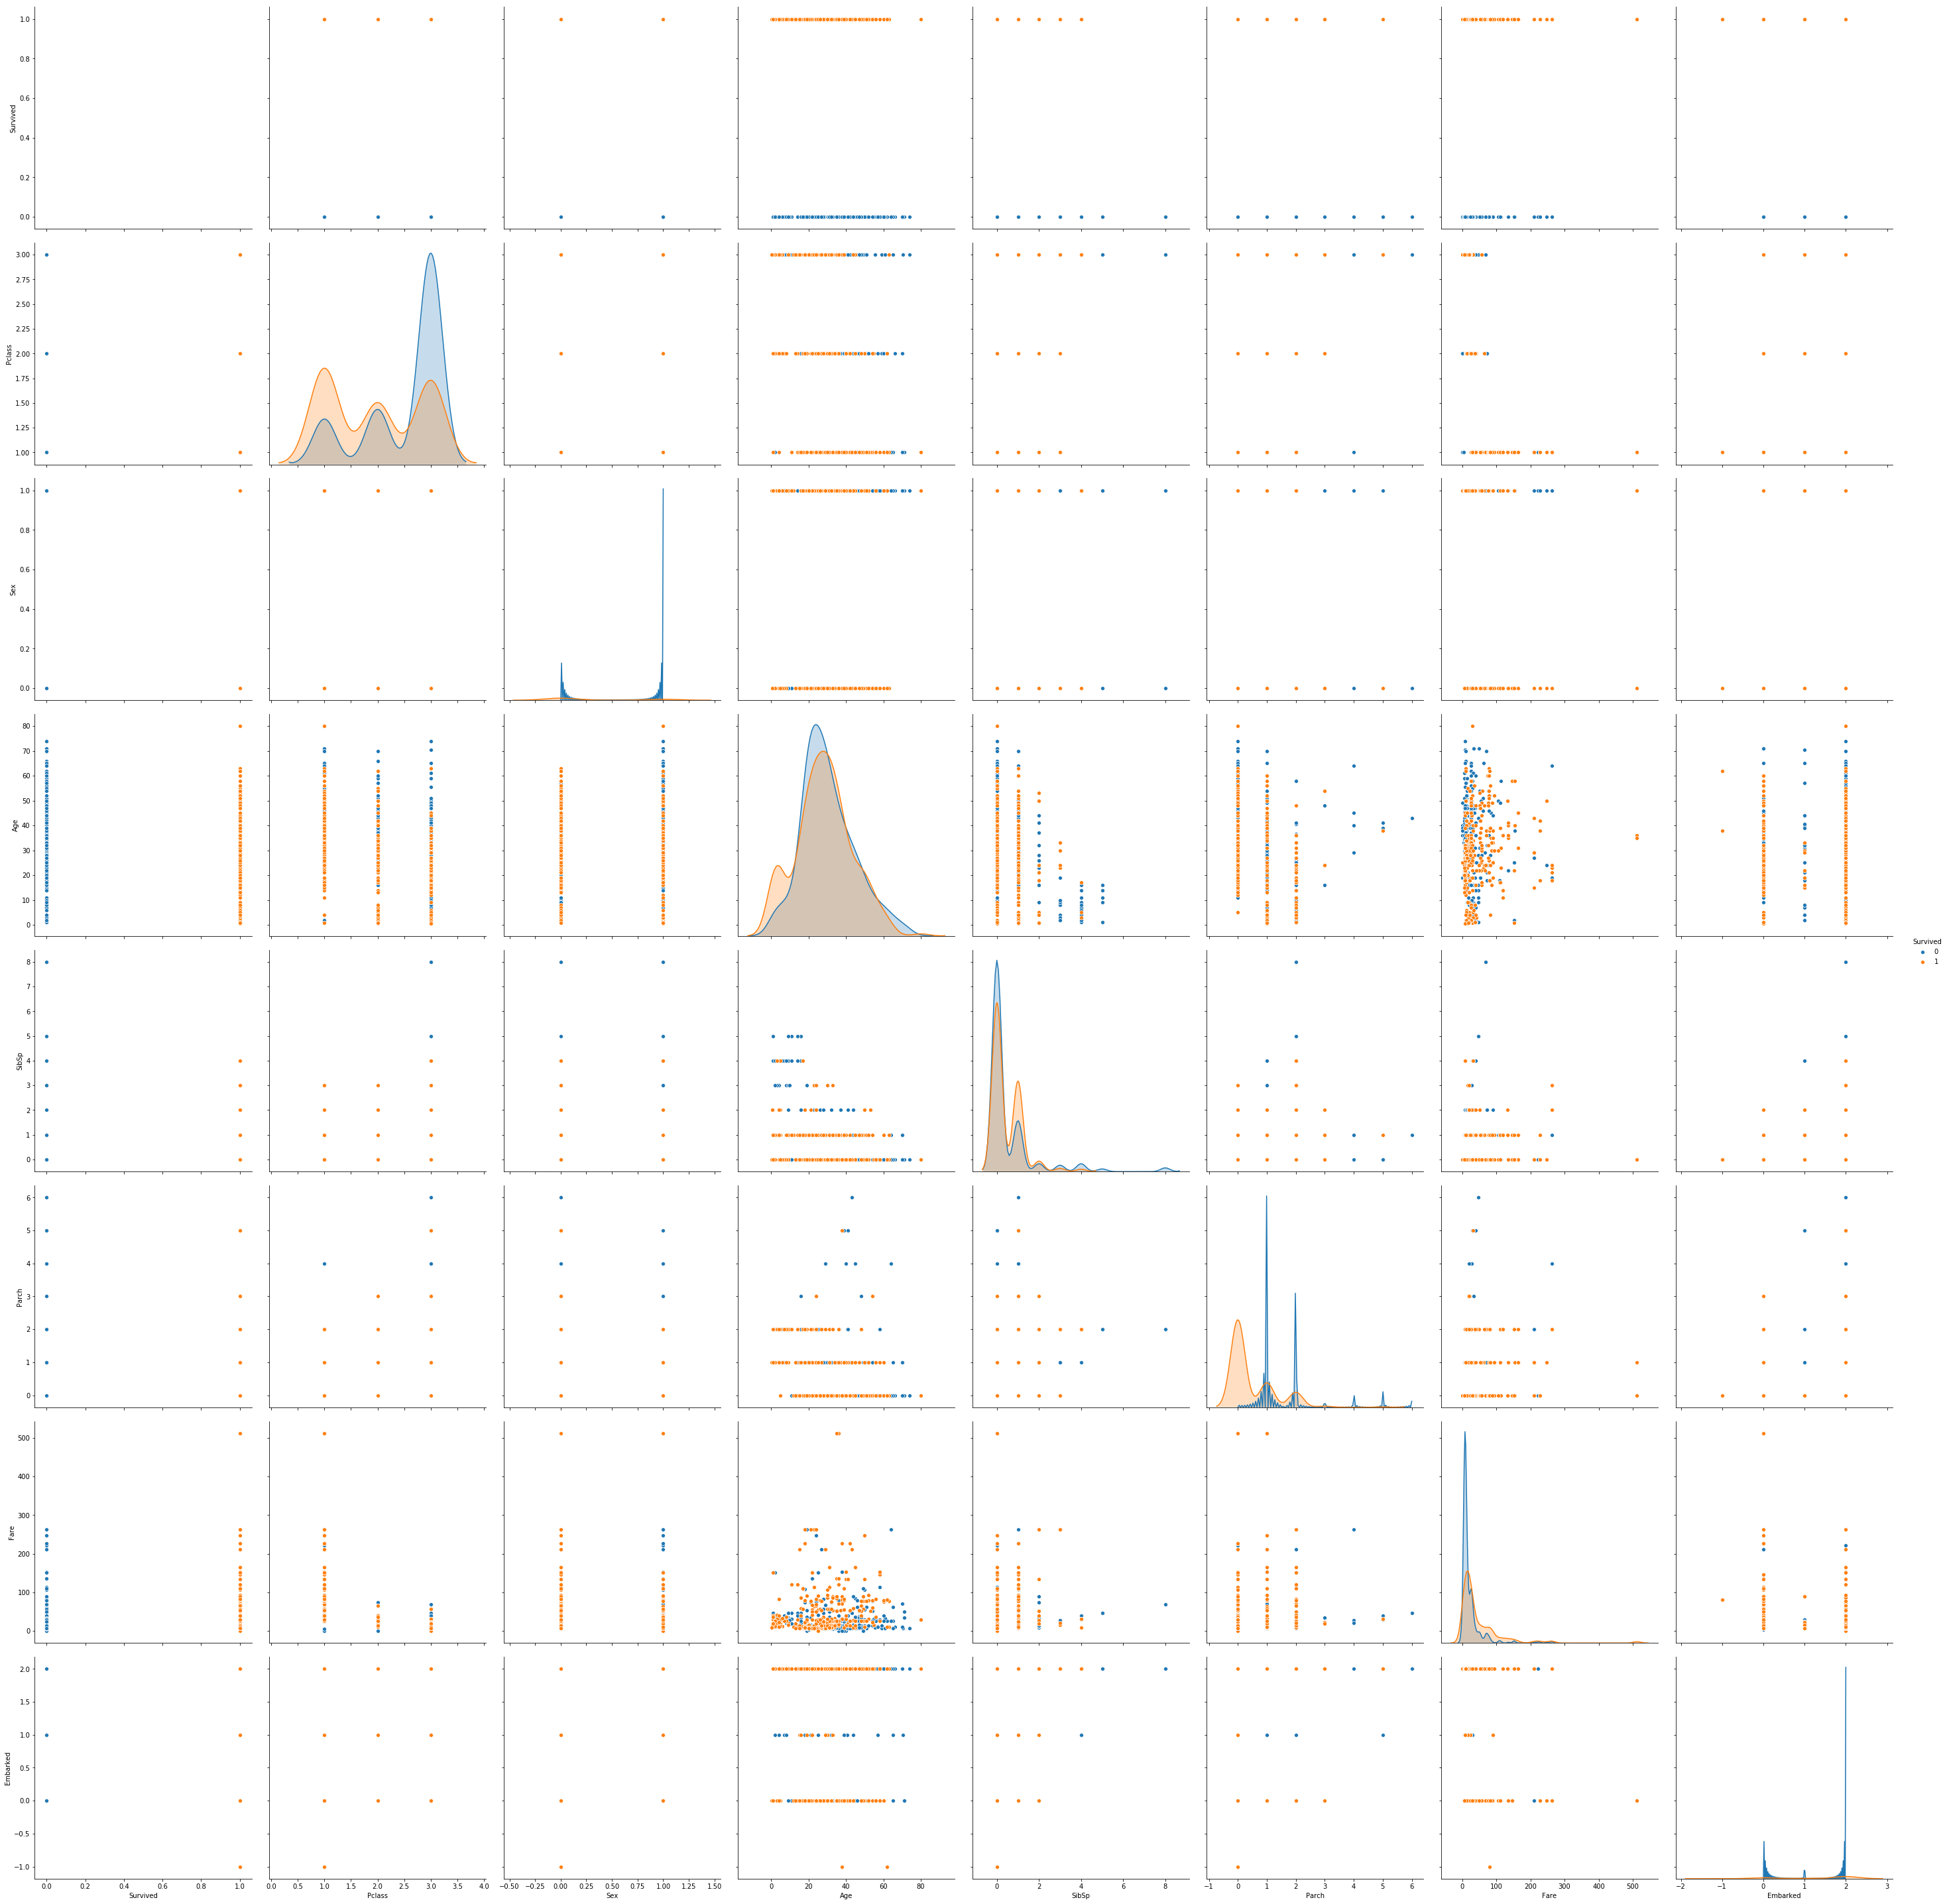

In [ ]:
g=sns.pairplot(data_c, hue="Survived", size= 5)

In [ ]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data_c['Age'] = data_c['Age'].fillna(data_c['Age'].mean())

In [ ]:
data_c['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


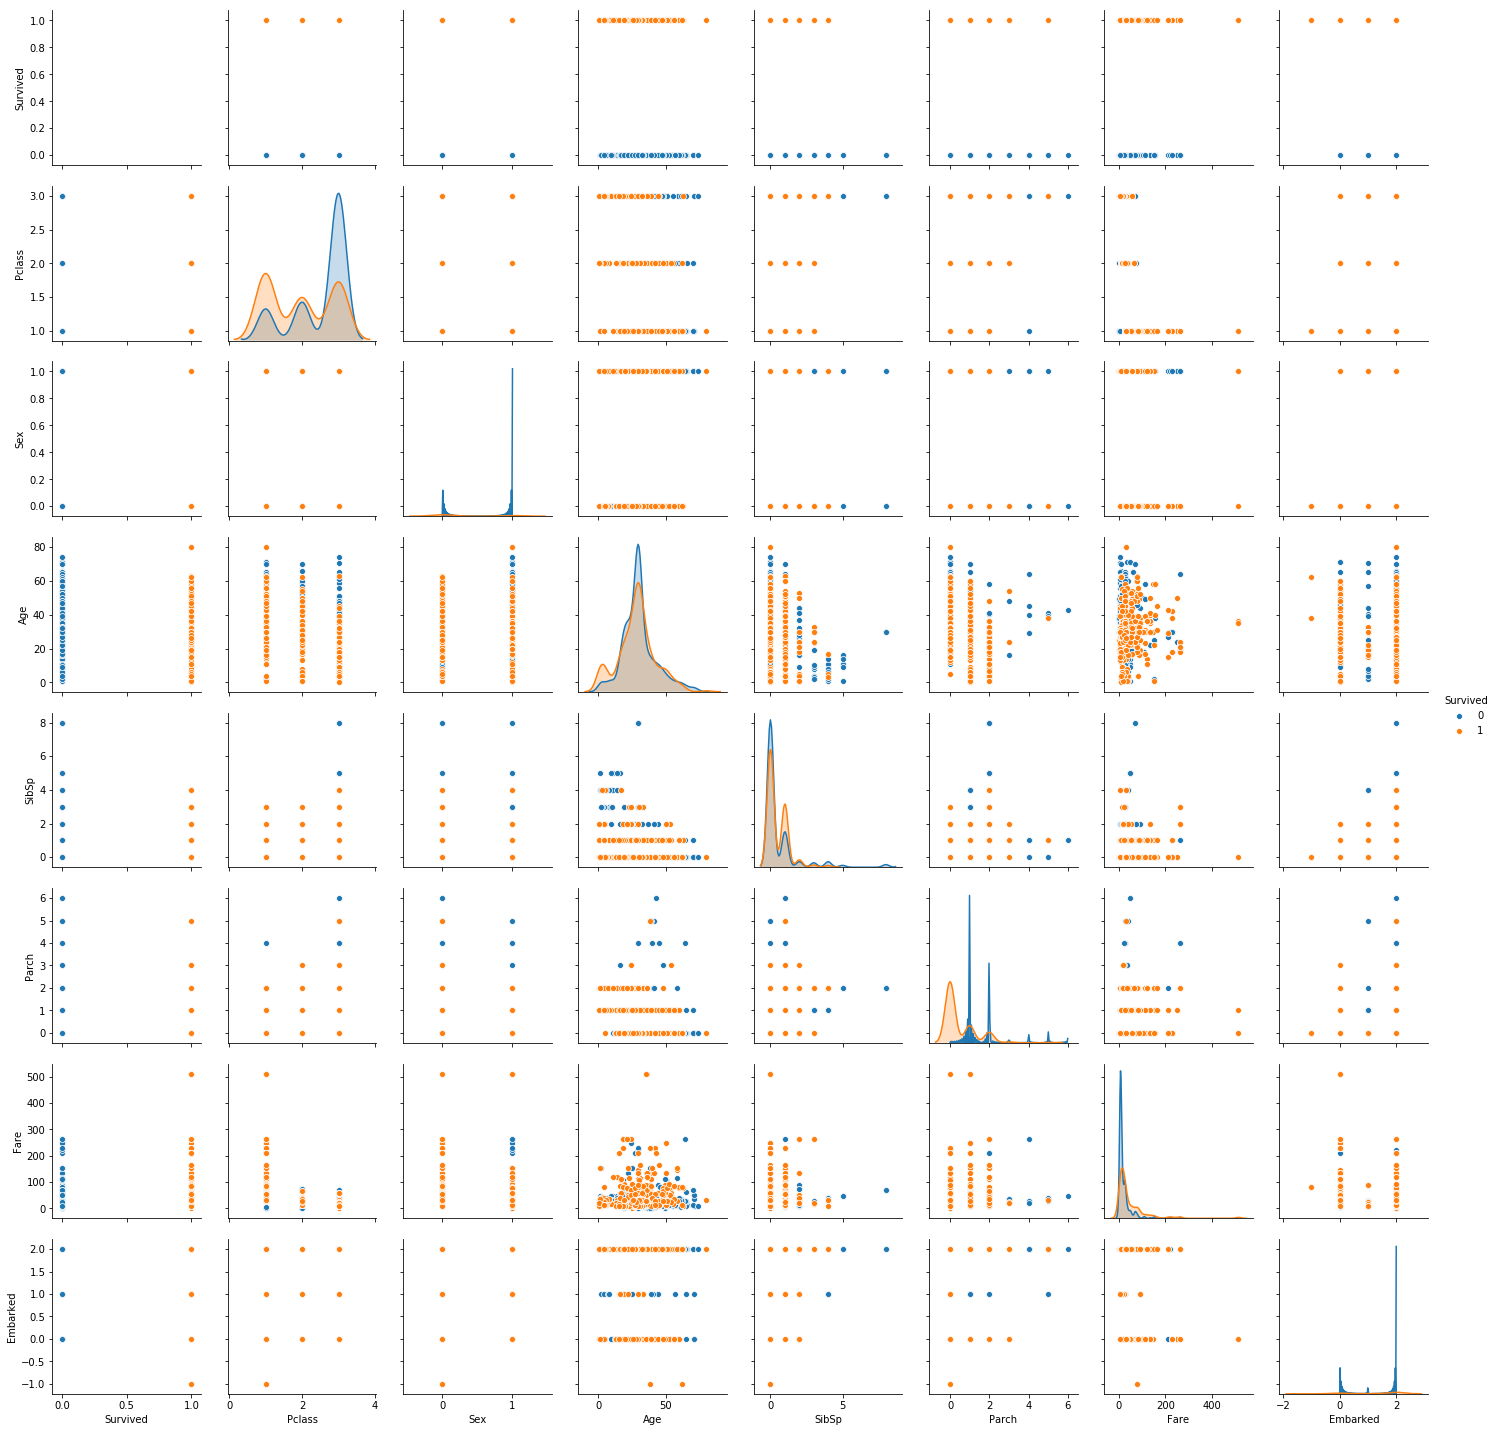

In [ ]:
g=sns.pairplot(data_c, hue="Survived", size= 2.5)

In [ ]:
data_c.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
#Formtatting the data 
cols = data_c.columns
features = cols[1:]
labels = cols[0]
print(features)
print(labels)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Survived


In [ ]:
labels

'Survived'

In [ ]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data
for feature in features:
    data_c[feature] = (data_c[feature] - data_c[feature].mean())/data_c[feature].std()

#Show that should now have zero mean
print("Averages")
print(data_c.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(data_c.std(),2))

Averages
Survived    3.838384e-01
Pclass      1.679664e-16
Sex        -4.273923e-16
Age         4.490952e-15
SibSp       1.528893e-16
Parch      -3.638441e-17
Fare        7.437622e-16
Embarked   -9.868649e-17
dtype: float64

 Deviations
Survived    0.236772
Pclass      1.000000
Sex         1.000000
Age         1.000000
SibSp       1.000000
Parch       1.000000
Fare        1.000000
Embarked    1.000000
dtype: float64


In [ ]:
data_c

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.826913,0.737281,-5.921480e-01,0.432550,-0.473408,-0.502163,0.587636
1,1,-1.565228,-1.354813,6.384304e-01,0.432550,-0.473408,0.786404,-1.911570
2,1,0.826913,-1.354813,-2.845034e-01,-0.474279,-0.473408,-0.488580,0.587636
3,1,-1.565228,-1.354813,4.076970e-01,0.432550,-0.473408,0.420494,0.587636
4,0,0.826913,0.737281,4.076970e-01,-0.474279,-0.473408,-0.486064,0.587636
5,0,0.826913,0.737281,4.371893e-15,-0.474279,-0.473408,-0.477848,-0.661967
6,0,-1.565228,0.737281,1.869009e+00,-0.474279,-0.473408,0.395591,0.587636
7,0,0.826913,0.737281,-2.130371e+00,2.246209,0.767199,-0.223957,0.587636
8,1,0.826913,-1.354813,-2.075923e-01,-0.474279,2.007806,-0.424018,0.587636
9,1,-0.369158,-1.354813,-1.207437e+00,0.432550,-0.473408,-0.042931,-1.911570


In [ ]:
X = data_c[features]
y = data_c[labels]

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.826913,0.737281,-0.592148,0.432550,-0.473408,-0.502163,0.587636
1,-1.565228,-1.354813,0.638430,0.432550,-0.473408,0.786404,-1.911570
2,0.826913,-1.354813,-0.284503,-0.474279,-0.473408,-0.488580,0.587636
3,-1.565228,-1.354813,0.407697,0.432550,-0.473408,0.420494,0.587636
4,0.826913,0.737281,0.407697,-0.474279,-0.473408,-0.486064,0.587636


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [ ]:
#Check to make sure split still has 7 features and 1 label
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(623, 7) (623,)
(268, 7) (268,)


In [ ]:
%%time
cls = autoskcl.AutoSklearnClassifier()
cls.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-09-26 14:51:22,622:EnsembleBuilder(1):f1138cb2200b593626b21057db6009a1] No models better than random - using Dummy Score!
[WARNING] [2019-09-26 14:51:22,640:EnsembleBuilder(1):f1138cb2200b593626b21057db6009a1] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

[WARNING] [2019-09-26 14:51:36,940:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-09-26 14:51:36,940:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


In [ ]:
predictions = cls.predict(X_test)

In [ ]:
predictions 

In [ ]:
sk.metrics.accuracy_score(y_test, predictions)

In [ ]:
cls.show_models()